In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
# SibSp = siblings ou spouse aboard
# Parch = parents or children aboard

train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

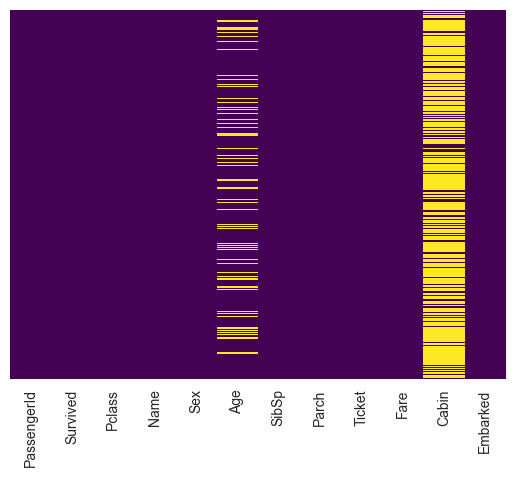

In [33]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot: xlabel='Survived', ylabel='count'>

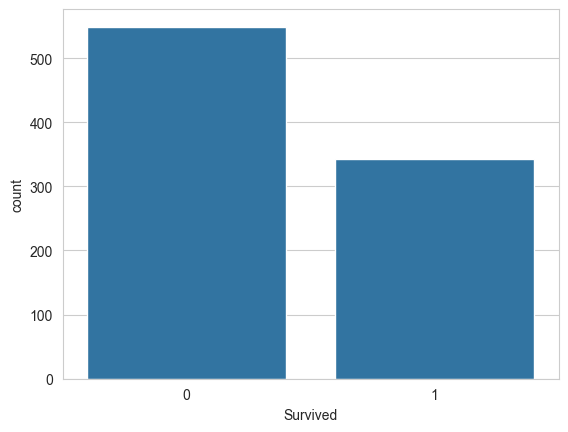

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

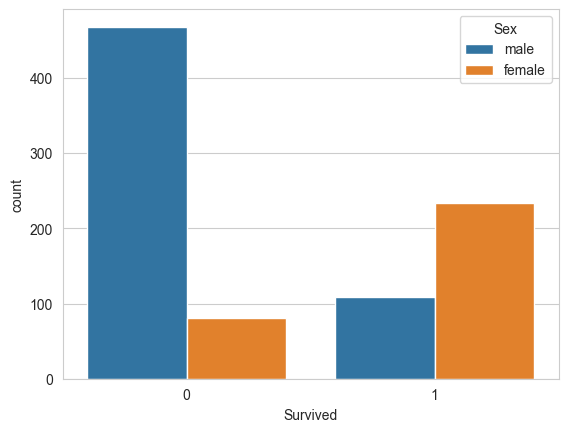

In [35]:
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot: xlabel='Survived', ylabel='count'>

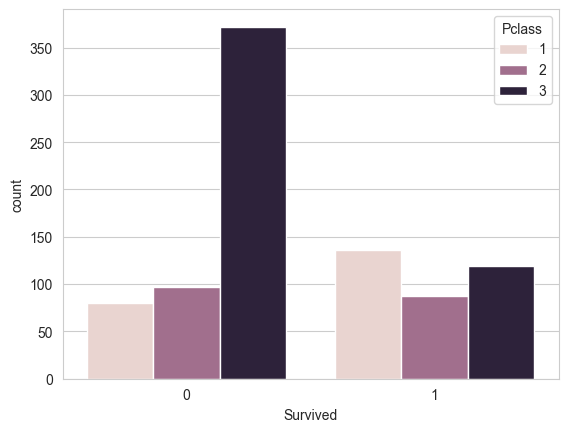

In [36]:
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot: xlabel='Age', ylabel='Count'>

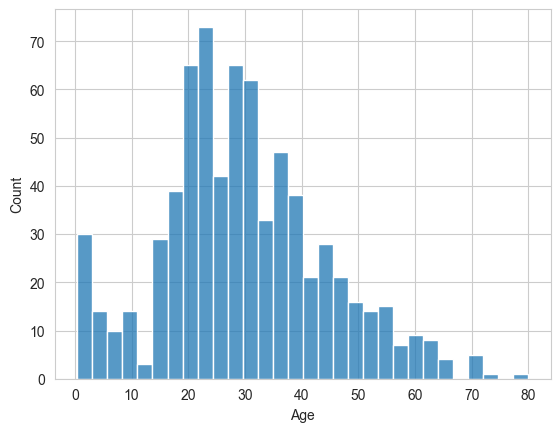

In [37]:
sns.histplot(train['Age'].dropna(), bins=30)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

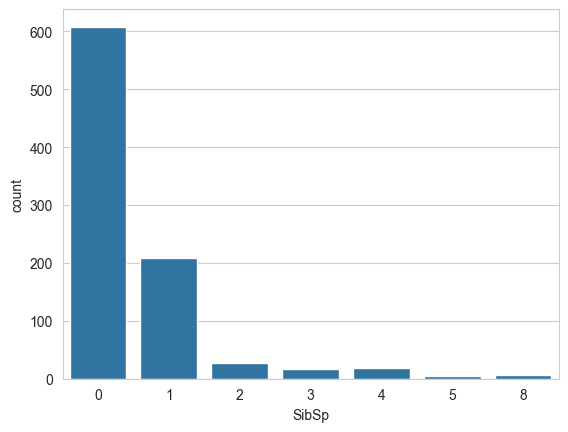

In [38]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot: >

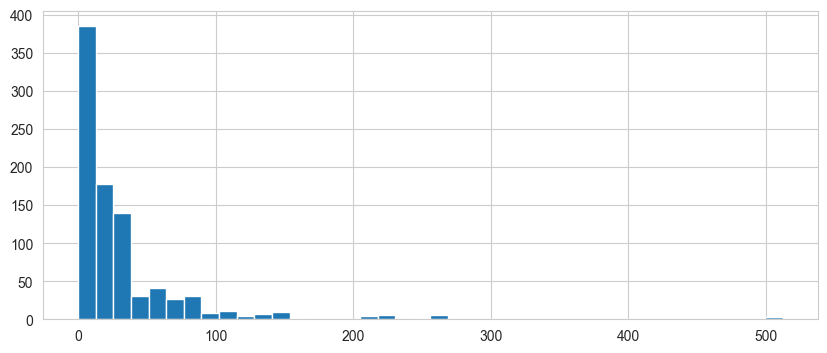

In [39]:
train['Fare'].hist(bins=40, figsize=(10,4))

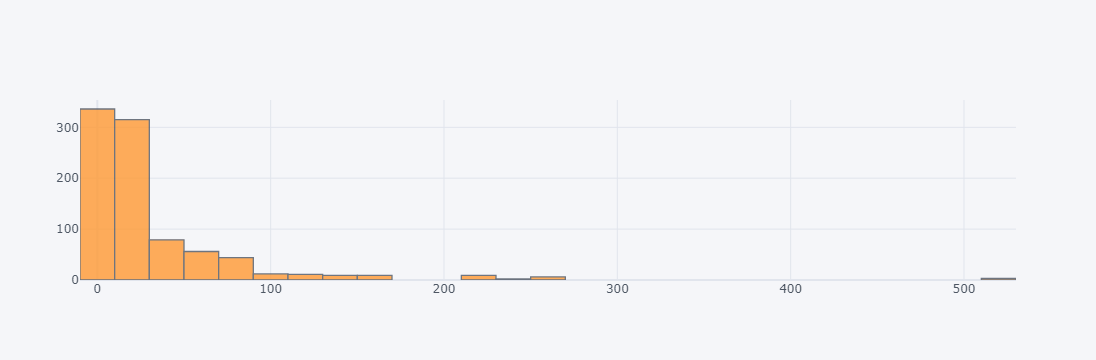

In [40]:
import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist', bins=50)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

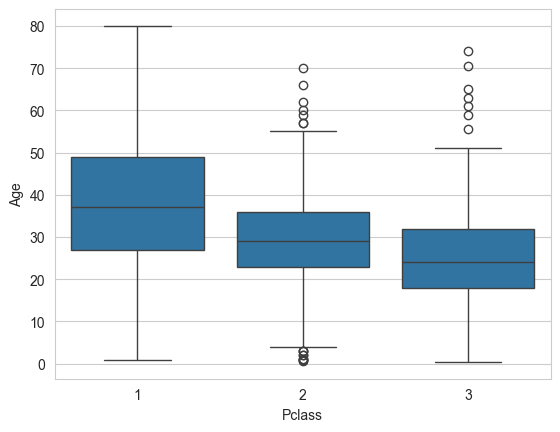

In [41]:
plt.figsize=((10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [42]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [43]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot: >

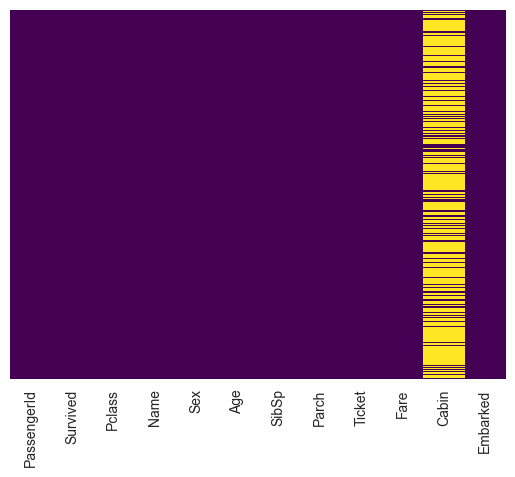

In [44]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [45]:
train = train.drop('Cabin', axis=1)

<AxesSubplot: >

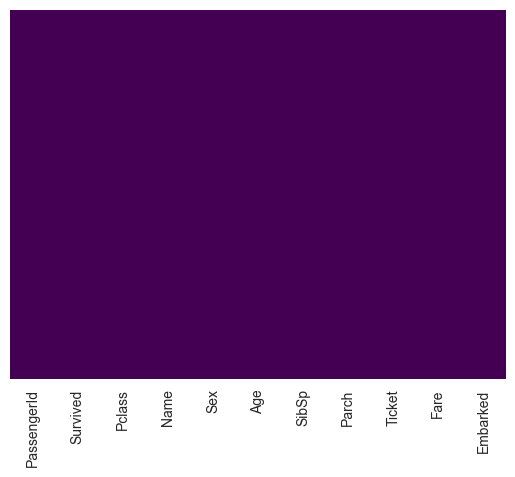

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [47]:
pd.get_dummies(train['Sex'].head()

SyntaxError: '(' was never closed (868903707.py, line 1)

In [25]:
# because two columns are not necessary when there are just 2 options (it could in fact affect the model's accuracy)
pd.get_dummies(train['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [48]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [49]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [50]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [51]:
train = train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
# after training the model, try to get dummies also for the Pclass column and see the different results of the model